# **Analyzing Temperature Data with PCA**
### A Machine Learning Project


## **Objective**
The goal of this project is to analyze temperature data using Principal Component Analysis (PCA) to uncover spatial and temporal patterns.
- **PCA on Cities**: Understand how cities cluster based on their temperature patterns throughout the year.
- **PCA on Months**: Understand how months cluster based on temperature variations across cities.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [24]:
# Import the dataset
ds = pd.read_csv('temperat.csv', sep=';', header=0)

# Extract necessary data
positions = ds.iloc[:, [15, 16]].to_numpy()  # Latitude and Longitude (assuming they are in columns 15 and 16)
cities = ds.iloc[:, 0].to_numpy()  # City names (assuming they are in column 0)
X = ds.iloc[:, 1:13].to_numpy().astype(float)  # Temperature data (assuming columns 1 to 12)

## **Dataset Overview**
- **Rows**: Each row represents a city.
- **Columns**:
  - The first column contains city names.
  - Columns 2 to 13 represent average monthly temperatures for each city.
  - Additional columns include metadata such as latitude and longitude for visualization purposes.


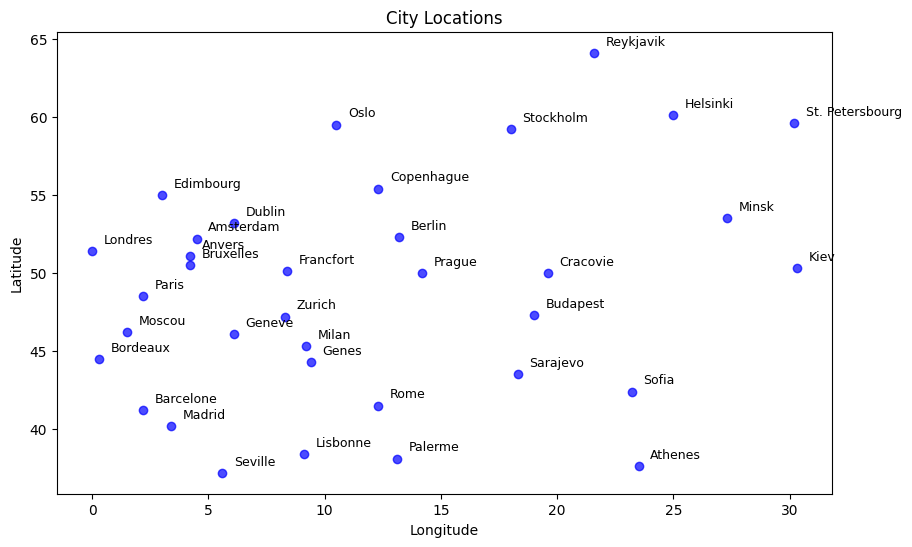

In [25]:
# Scatter plot with correctly placed labels
plt.figure(figsize=(10, 6))  # Set figure size
plt.scatter(positions[:, 1], positions[:, 0], color='blue', alpha=0.7)  # Longitude as x, Latitude as y
for i in range(positions.shape[0]):
    # Add labels with slight offsets to avoid overlap
    plt.text(positions[i, 1] + 0.5, positions[i, 0] + 0.5, cities[i], fontsize=9)

# Add titles and axis labels
plt.title("City Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Display the plot
plt.show()

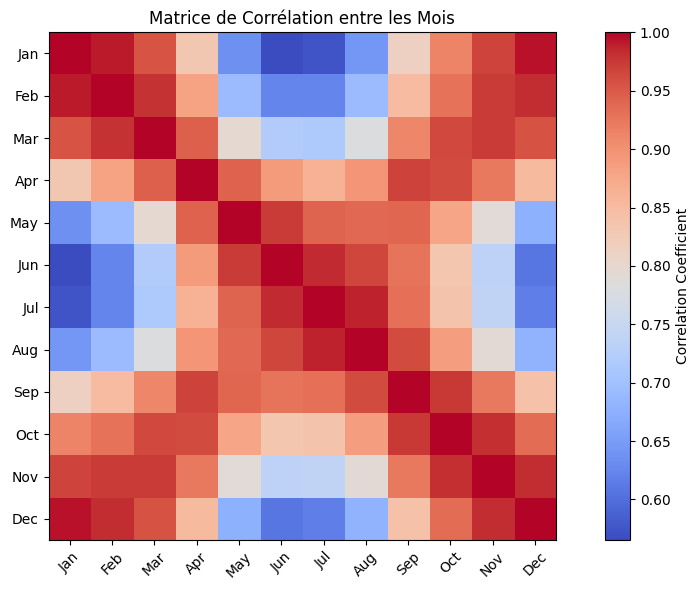

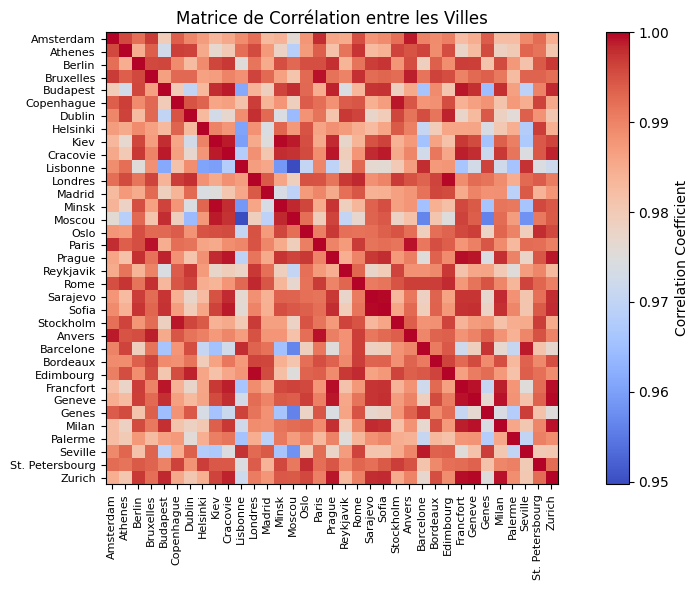

Interprétations :
1. Corrélations entre les mois :
- Les mois proches les uns des autres (exemple : janvier et décembre) montrent des corrélations positives, car ils partagent des climats similaires.
- Les mois éloignés (exemple : janvier et août) montrent des corrélations négatives, car ils représentent des climats opposés (hiver vs été).

2. Corrélations entre les villes :
- Les villes ayant des climats similaires toute l'année (exemple : Barcelone et Madrid) présentent des corrélations positives élevées.
- Les villes avec des climats très différents (exemple : Barcelone et Moscou) montrent des corrélations faibles ou négatives.


In [27]:
# Calcul des matrices de corrélation
# Corrélation entre les mois (colonnes de X)
X_corr_months = np.corrcoef(X, rowvar=False)  # Corrélation entre les mois

# Corrélation entre les villes (lignes de X)
X_corr_cities = np.corrcoef(X.T, rowvar=False)  # Corrélation entre les villes

# Visualisation des corrélations entre les mois
plt.figure(figsize=(10, 6))
plt.imshow(X_corr_months, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title("Matrice de Corrélation entre les Mois")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.yticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Visualisation des corrélations entre les villes
plt.figure(figsize=(10, 6))
plt.imshow(X_corr_cities, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title("Matrice de Corrélation entre les Villes")
plt.xticks(range(len(cities)), cities, rotation=90, fontsize=8)
plt.yticks(range(len(cities)), cities, fontsize=8)
plt.tight_layout()
plt.show()

# Interprétations
print("Interprétations :")
print("1. Corrélations entre les mois :")
print("- Les mois proches les uns des autres (exemple : janvier et décembre) montrent des corrélations positives, car ils partagent des climats similaires.")
print("- Les mois éloignés (exemple : janvier et août) montrent des corrélations négatives, car ils représentent des climats opposés (hiver vs été).")

print("\n2. Corrélations entre les villes :")
print("- Les villes ayant des climats similaires toute l'année (exemple : Barcelone et Madrid) présentent des corrélations positives élevées.")
print("- Les villes avec des climats très différents (exemple : Barcelone et Moscou) montrent des corrélations faibles ou négatives.")


#1. PCA on cities


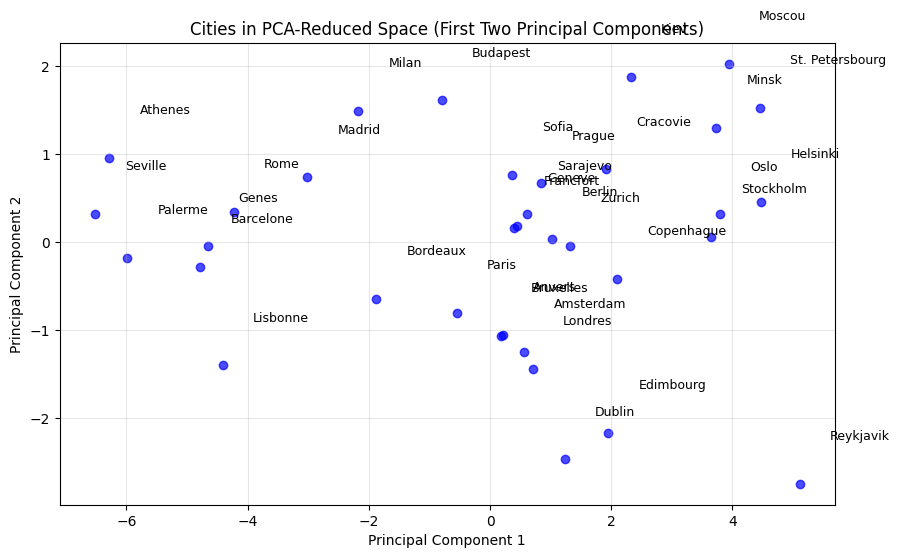

Cities PCA:
First Principal Component (v1): [-0.27443791 -0.28358073 -0.29684215 -0.30355922 -0.28255017 -0.27186765
 -0.27145138 -0.28289232 -0.30593272 -0.30752069 -0.2990035  -0.28102476]
Second Principal Component (v2): [-0.39080973 -0.33341138 -0.21079951  0.04922076  0.30746843  0.39981651
  0.39284899  0.31674797  0.11657025 -0.06138509 -0.206456   -0.3467203 ]


In [31]:
# Standardizing the data for cities (X)
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Perform PCA for Cities
# Compute the covariance matrix
cov_matrix_cities = X_std.T @ X_std

# Eigen decomposition
eigenvalues_cities, eigenvectors_cities = np.linalg.eig(cov_matrix_cities)

# Sort eigenvalues and eigenvectors
sorted_indices_cities = np.argsort(eigenvalues_cities)[::-1]
eigenvalues_cities = eigenvalues_cities[sorted_indices_cities]
eigenvectors_cities = eigenvectors_cities[:, sorted_indices_cities]

# Extract the first two principal components
v1_cities = eigenvectors_cities[:, 0]
v2_cities = eigenvectors_cities[:, 1]

# Project cities data onto the first two principal components
xv1_cities = X_std @ v1_cities
xv2_cities = X_std @ v2_cities

# Scatter Plot for Cities
plt.figure(figsize=(10, 6))
plt.scatter(xv1_cities, xv2_cities, color='blue', alpha=0.7)
for i in range(positions.shape[0]):
    plt.text(xv1_cities[i] + 0.5, xv2_cities[i] + 0.5, cities[i], fontsize=9)
plt.title("Cities in PCA-Reduced Space (First Two Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.show()

# Print eigenvectors for cities interpretation
print("Cities PCA:")
print("First Principal Component (v1):", v1_cities)
print("Second Principal Component (v2):", v2_cities)

#2. PCA on months

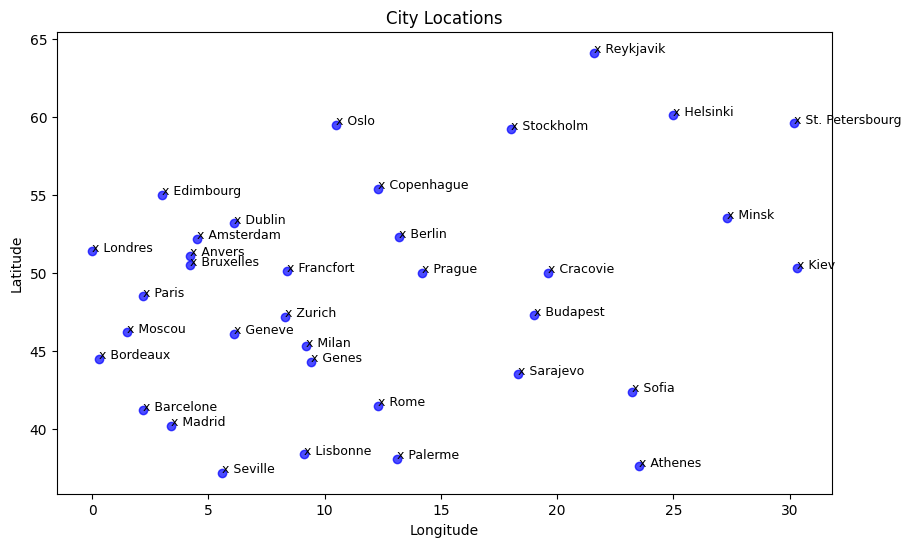

Months PCA:
First Principal Component (v1): [0.16912165+0.j 0.16894556+0.j 0.16954367+0.j 0.1696959 +0.j
 0.16866408+0.j 0.16924758+0.j 0.16874306+0.j 0.16848144+0.j
 0.16880358+0.j 0.1692273 +0.j 0.16740011+0.j 0.16967093+0.j
 0.16867372+0.j 0.16878442+0.j 0.1680242 +0.j 0.16956488+0.j
 0.16953266+0.j 0.16944351+0.j 0.16867056+0.j 0.16967282+0.j
 0.16927589+0.j 0.16944701+0.j 0.16920426+0.j 0.16959232+0.j
 0.16821767+0.j 0.16954094+0.j 0.16945459+0.j 0.16915757+0.j
 0.16949046+0.j 0.16813205+0.j 0.16912852+0.j 0.16824208+0.j
 0.16830665+0.j 0.16956078+0.j 0.16938432+0.j]
Second Principal Component (v2): [-0.10381829+0.j -0.19217641+0.j  0.10161524+0.j -0.07118003+0.j
  0.23952392+0.j -0.07360698+0.j -0.21631082+0.j  0.08567391+0.j
  0.23359776+0.j  0.18768907+0.j -0.30457841+0.j -0.09353542+0.j
 -0.13584899+0.j  0.224573  +0.j  0.30616448+0.j  0.09035113+0.j
 -0.08192486+0.j  0.15682016+0.j -0.13028129+0.j -0.1222415 +0.j
  0.12758298+0.j  0.12592967+0.j -0.08289917+0.j -0.06217953+0.

In [35]:
# Standardizing the transposed data for months (Xcopy)
Xcopy_std = (Xcopy - np.mean(Xcopy, axis=0)) / np.std(Xcopy, axis=0)

# Perform PCA for Months
# Compute the covariance matrix
cov_matrix_months = Xcopy_std.T @ Xcopy_std

# Eigen decomposition
eigenvalues_months, eigenvectors_months = np.linalg.eig(cov_matrix_months)

# Sort eigenvalues and eigenvectors
sorted_indices_months = np.argsort(eigenvalues_months)[::-1]
eigenvalues_months = eigenvalues_months[sorted_indices_months]
eigenvectors_months = eigenvectors_months[:, sorted_indices_months]

# Extract the first two principal components
v1_months = eigenvectors_months[:, 0]
v2_months = eigenvectors_months[:, 1]

# Project months data onto the first two principal components
xv1_months = Xcopy_std @ v1_months
xv2_months = Xcopy_std @ v2_months

# Scatter Plot for Months
plt.figure(figsize=(10, 6))
plt.scatter(positions[:, 1], positions[:, 0], color='blue', alpha=0.7)  # Longitude as x, Latitude as y
for i in range(positions.shape[0]):
    plt.text(positions[i, 1], positions[i, 0], 'x ' + cities[i], fontsize=9)  # Match scatter coordinates
plt.title("City Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Print eigenvectors for months interpretation
print("Months PCA:")
print("First Principal Component (v1):", v1_months)
print("Second Principal Component (v2):", v2_months)

#3. Interpretation and comments

## **Conclusions**
- PCA on cities revealed clusters of cities with similar temperature patterns and separated cities with distinct climates.
- PCA on months highlighted seasonal trends, with months clustering into colder, warmer, and transitional groups.
- These insights provide a comprehensive understanding of both spatial (cities) and temporal (months) relationships in the dataset.


## **Future Work**
- Apply clustering techniques (e.g., k-means) to group cities or months more formally.
- Explore other datasets to extend this analysis to a global scale or specific regions.
- Investigate anomalies (e.g., months or cities that deviate from expected trends).
- Incorporate other climate-related data such as precipitation or humidity for a multi-dimensional analysis.


## **Credits**
- Data provided by Yann Chevaleyre.
- Analysis and implementation by Mohamed ZOUAD & Mohamed El Amine ROUIBI.
